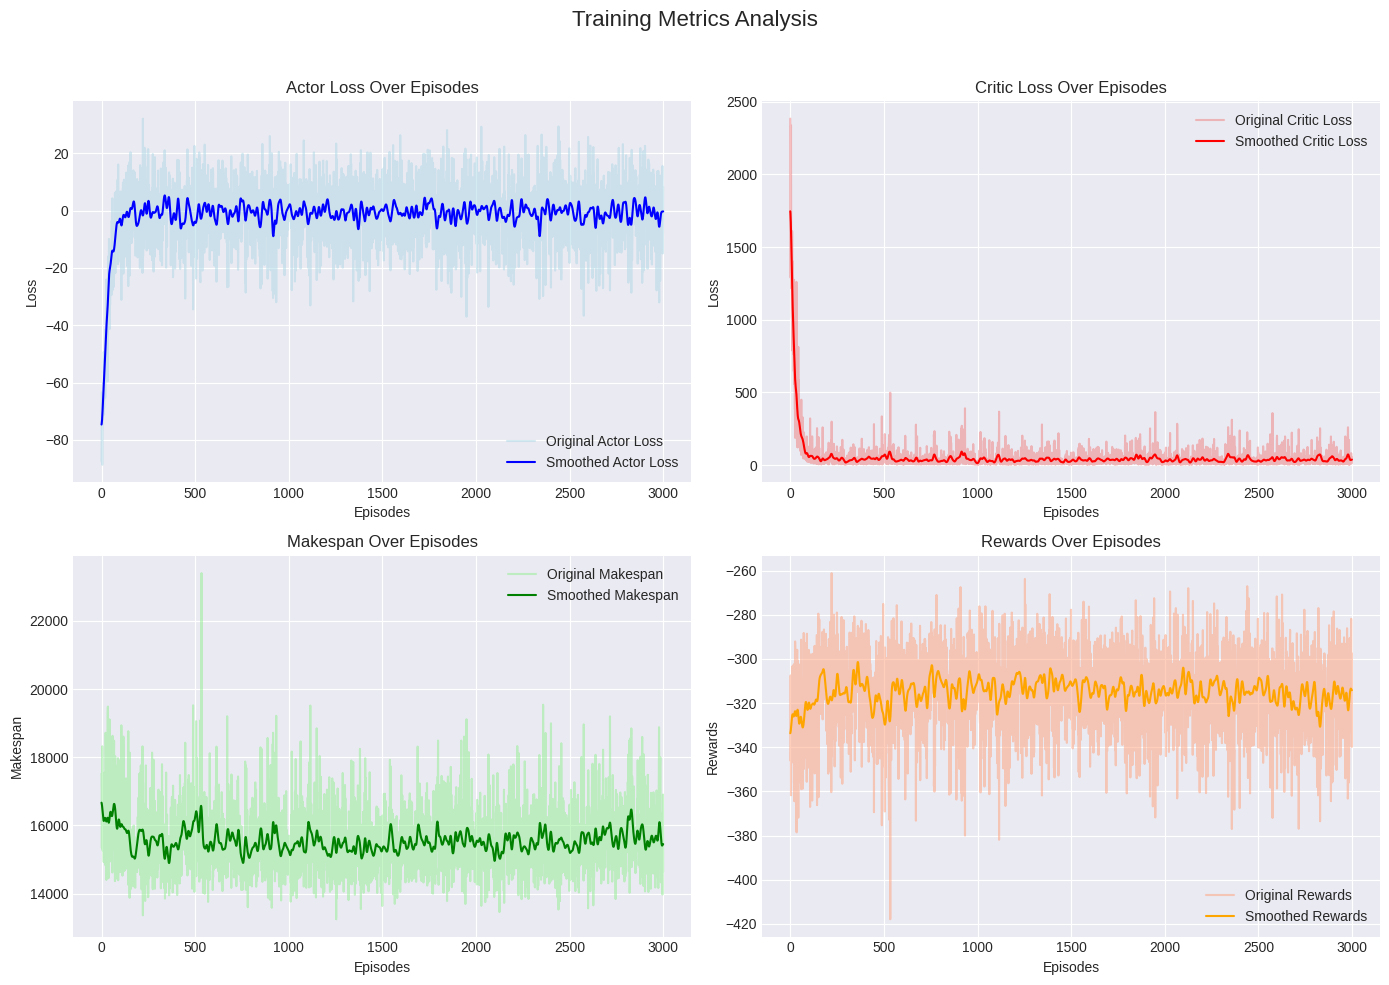

In [ ]:

# Function to read data from a file
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Function to read data from a file
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [float(line.strip()) for line in file]
    return data

# Function to smooth data using Gaussian filter
def smooth_data(data, sigma=5):
    return gaussian_filter1d(data, sigma=sigma)

# File paths
actor_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/236/actor_loss_04_15_08_46.txt"  # Replace with actual path
critic_loss_path = "/home/aaa/my_code/hospital-main/A2C_output/236/critic_loss_04_15_08_46.txt"  # Replace with actual path
makespan_path = "/home/aaa/my_code/hospital-main/A2C_output/236/makespan_04_15_08_46.txt"  # Replace with actual path
rewards_path = "/home/aaa/my_code/hospital-main/A2C_output/236/rewards_04_15_08_46.txt"  # Replace with actual path

# Read data
try:
    actor_loss = read_data(actor_loss_path)
    critic_loss = read_data(critic_loss_path)
    makespan = read_data(makespan_path)
    rewards = read_data(rewards_path)
except Exception as e:
    print(f"Error reading files: {e}")
    exit()

# Smooth data
actor_loss_smooth = smooth_data(actor_loss)
critic_loss_smooth = smooth_data(critic_loss)
makespan_smooth = smooth_data(makespan)
rewards_smooth = smooth_data(rewards)

# Use seaborn style for a cleaner look
plt.style.use("seaborn-v0_8-darkgrid")

# Set up a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Training Metrics Analysis", fontsize=16)

# Plot Actor Loss
axes[0, 0].plot(actor_loss, label="Original Actor Loss", color='lightblue', alpha=0.5)
axes[0, 0].plot(actor_loss_smooth, label="Smoothed Actor Loss", color='blue')
axes[0, 0].set_title("Actor Loss Over Episodes")
axes[0, 0].set_xlabel("Episodes")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()

# Plot Critic Loss
axes[0, 1].plot(critic_loss, label="Original Critic Loss", color='lightcoral', alpha=0.5)
axes[0, 1].plot(critic_loss_smooth, label="Smoothed Critic Loss", color='red')
axes[0, 1].set_title("Critic Loss Over Episodes")
axes[0, 1].set_xlabel("Episodes")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].legend()

# Plot Makespan
axes[1, 0].plot(makespan, label="Original Makespan", color='lightgreen', alpha=0.5)
axes[1, 0].plot(makespan_smooth, label="Smoothed Makespan", color='green')
axes[1, 0].set_title("Makespan Over Episodes")
axes[1, 0].set_xlabel("Episodes")
axes[1, 0].set_ylabel("Makespan")
axes[1, 0].legend()

# Plot Rewards
axes[1, 1].plot(rewards, label="Original Rewards", color='lightsalmon', alpha=0.5)
axes[1, 1].plot(rewards_smooth, label="Smoothed Rewards", color='orange')
axes[1, 1].set_title("Rewards Over Episodes")
axes[1, 1].set_xlabel("Episodes")
axes[1, 1].set_ylabel("Rewards")
axes[1, 1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
plt.show()
